In [1]:
# generally used modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# visualization modules
import matplotlib.pyplot as plt
from plotnine import (
    ggplot, geom_density, geom_errorbar, geom_line, geom_point, xlab, ylab,
    ggtitle, theme, facet_wrap, geom_boxplot, geom_violin, geom_bar,  aes
)

# internal modules
from housees_pipeline.constants import CATEGORICAL_COLUMNS, NUMERICAL_COLUMNS


### Load the houses data

In [3]:
houses_df = pd.read_csv("../data/interim/train.csv")

### Cast to correct types

In [4]:
categoricals = houses_df.columns & CATEGORICAL_COLUMNS
numericals = houses_df.columns & NUMERICAL_COLUMNS

houses_df[categoricals] = houses_df[categoricals].apply(pd.Categorical, axis=0)

/var/folders/m5/zsd1m_dd4wd36c3_4bftzh280000gn/T/ipykernel_97703/2583759383.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
/var/folders/m5/zsd1m_dd4wd36c3_4bftzh280000gn/T/ipykernel_97703/2583759383.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.


### Split into train and test sets

In [5]:
SPLIT_SEED = 487

# split the data
houses_train_df, houses_test_df = train_test_split(
    houses_df,
    train_size=0.8,
    random_state=SPLIT_SEED
)


In [5]:
houses_train_df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1330,1331,20,RL,85.0,10000,Reg,Lvl,Inside,Somerst,Norm,...,3,825,144,45,0,12,2007,WD,Normal,227000
1013,1014,30,RM,60.0,7200,Reg,Lvl,Inside,OldTown,Norm,...,1,280,0,30,226,6,2009,WD,Normal,85000
738,739,90,RL,60.0,10800,Reg,Lvl,Inside,Edwards,Norm,...,0,0,120,0,0,3,2009,WD,Alloca,179000
487,488,20,RL,70.0,12243,IR1,Lvl,Inside,NWAmes,Norm,...,2,487,224,0,0,2,2007,WD,Normal,175000


### Set numerical and categorical columns

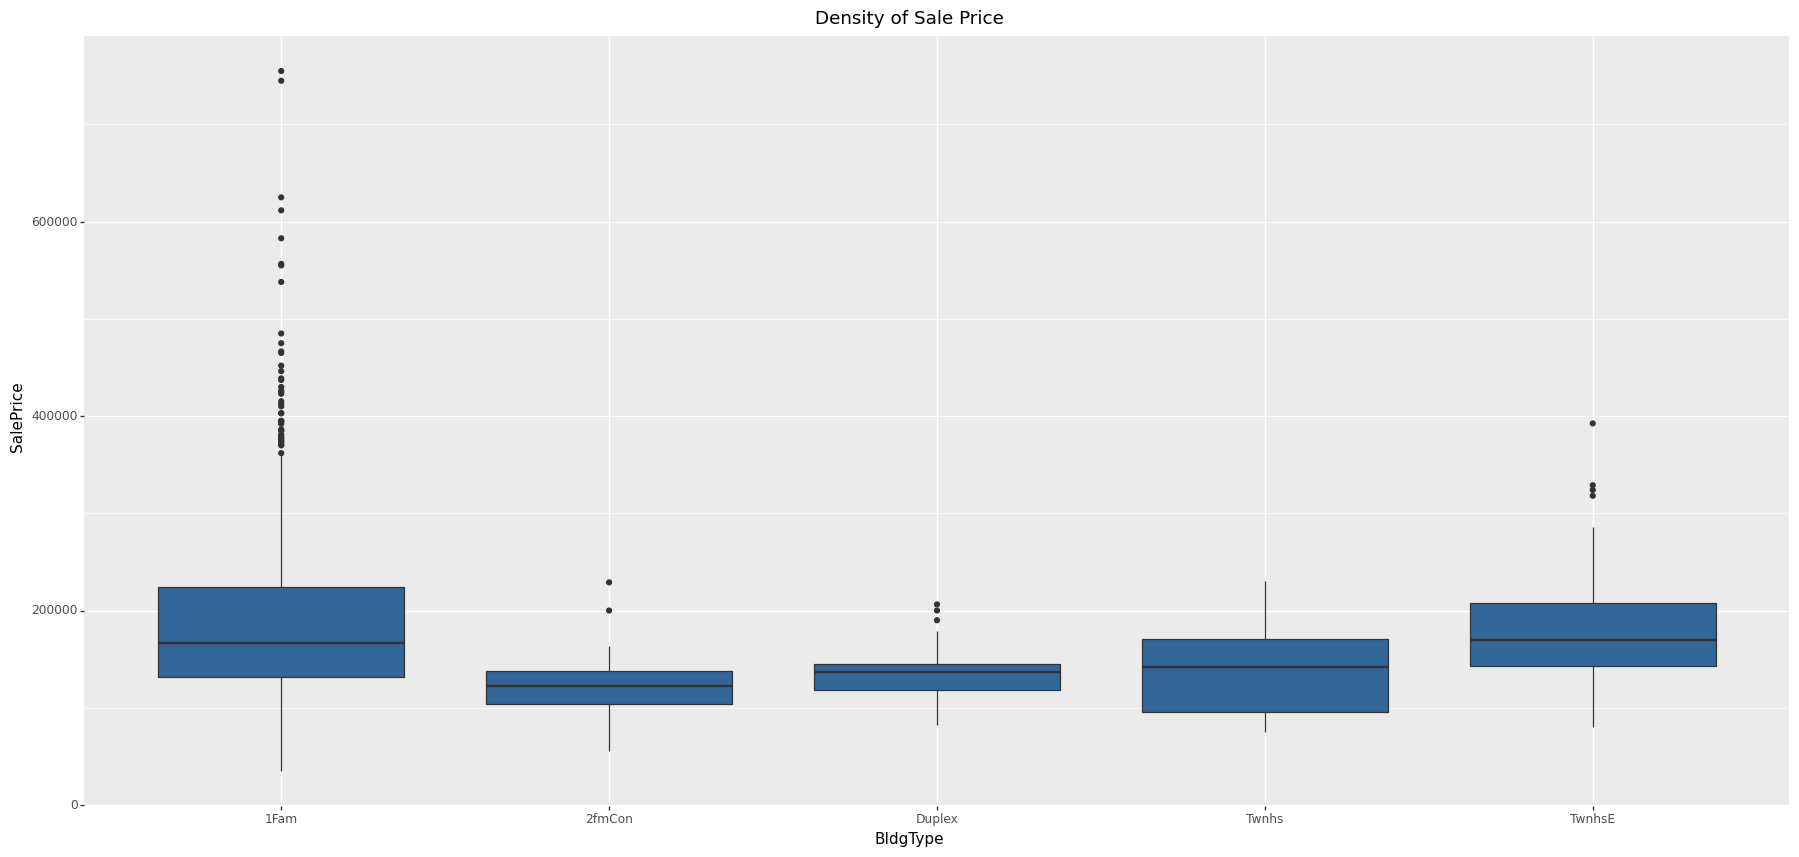

<ggplot: (385068060)>

In [26]:
(houses_train_df
 .pipe(ggplot) +
    aes(y='SalePrice', x='BldgType') +
    geom_boxplot(fill="#336699") +
    theme(figure_size=(22, 4)) +
    ggtitle("Density of Sale Price") +
    theme(figure_size=(22, 10))
)

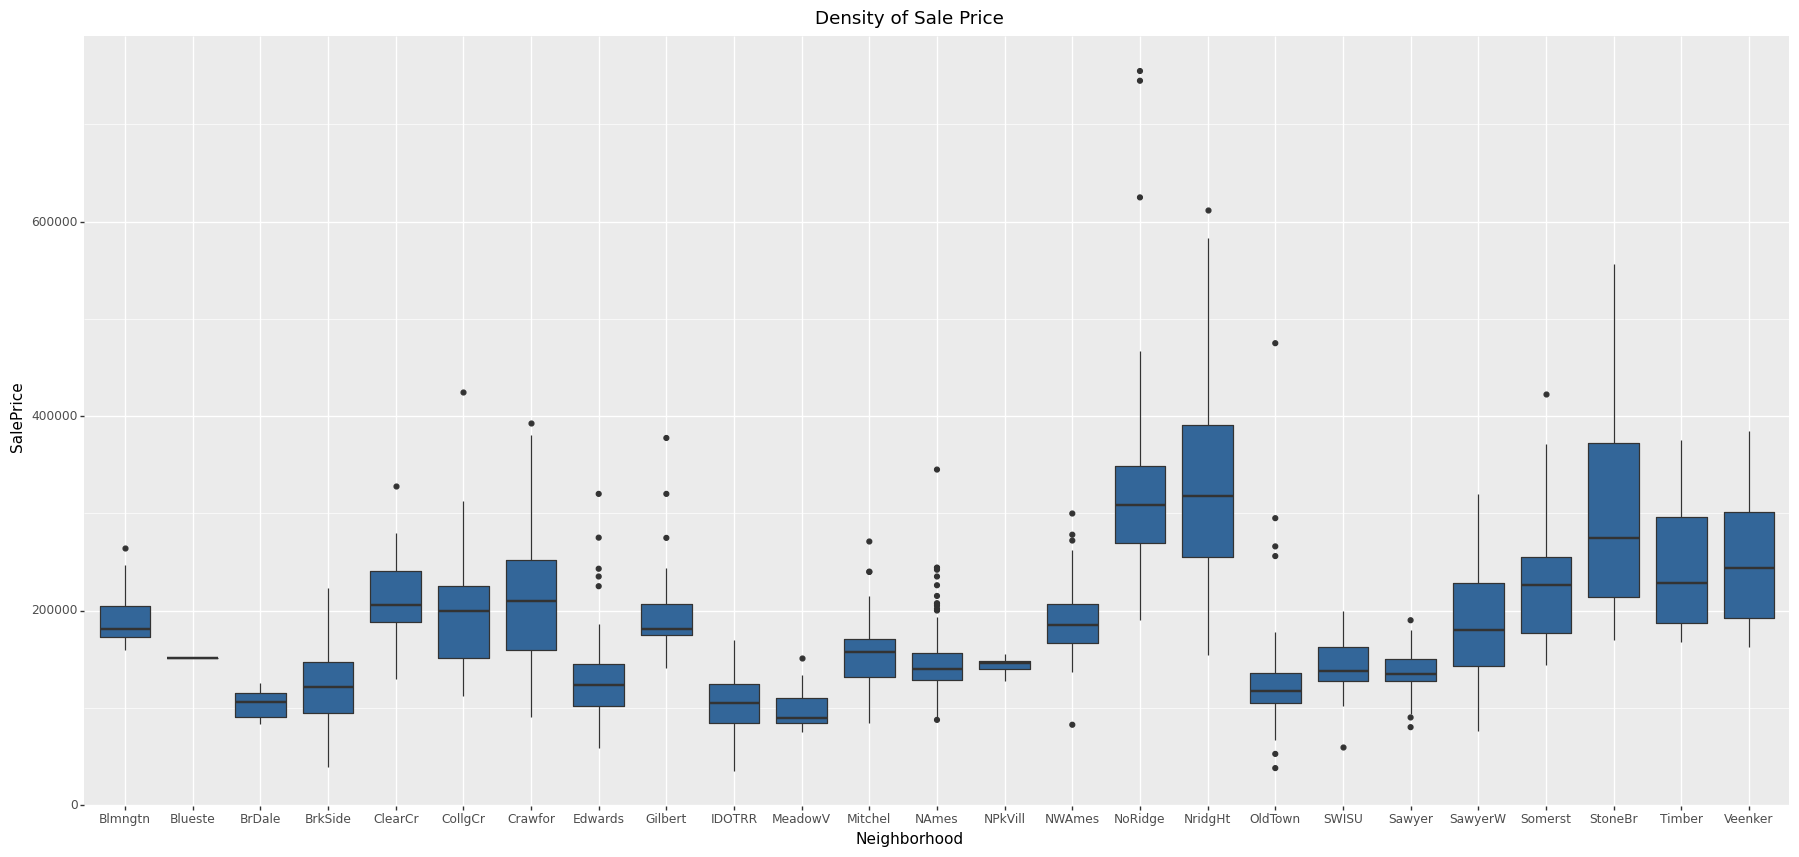

<ggplot: (387875702)>

In [35]:
(houses_train_df
 .pipe(ggplot) +
    aes(y='SalePrice', x='Neighborhood') +
    geom_boxplot(fill="#336699") +
    theme(figure_size=(22, 4)) +
    ggtitle("Density of Sale Price") +
    theme(figure_size=(22, 10))
)

/usr/local/Caskroom/miniconda/base/envs/houses/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


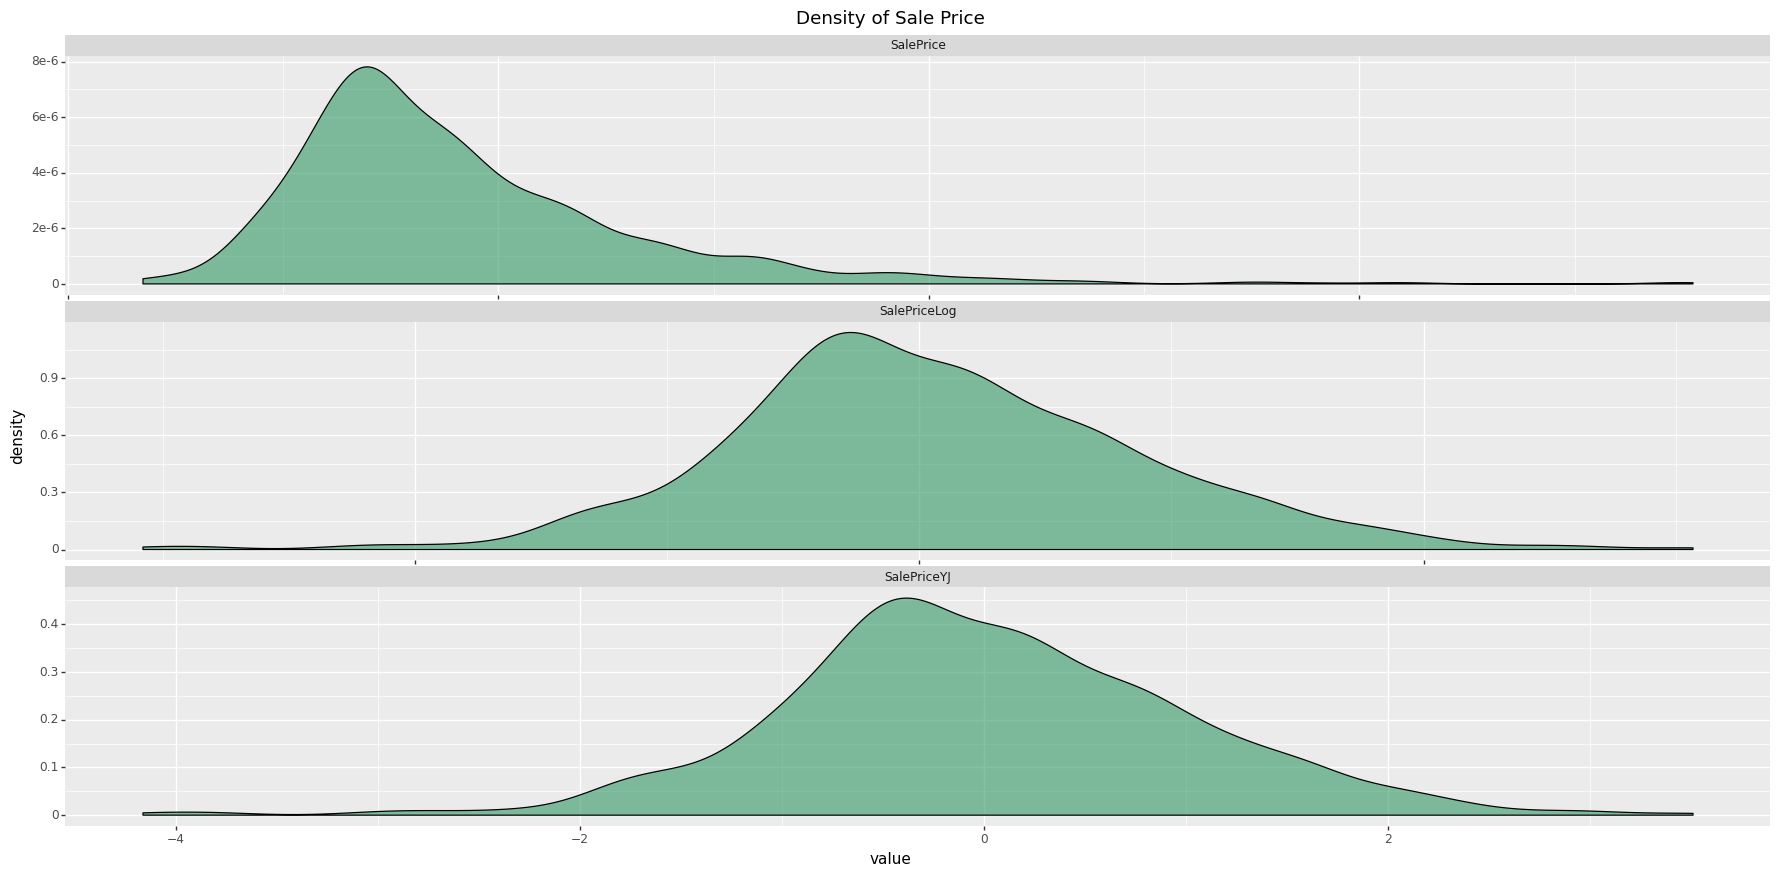

<ggplot: (387917325)>

In [40]:
from sklearn.preprocessing import PowerTransformer, OneHotEncoder

power_transformer = PowerTransformer(method='box-cox')
(houses_train_df[['SalePrice']]
 .assign(SalePriceLog=lambda df: np.log(df['SalePrice']))
 .assign(
    SalePriceYJ=lambda df: power_transformer.fit_transform(df[['SalePrice']])
)
 .melt()
 .pipe(ggplot) +
    aes(x='value') +
    geom_density(alpha=0.6, fill="#339966") +
    theme(figure_size=(22, 4)) +
    facet_wrap('variable', scales='free', ncol=1) +
    ggtitle("Density of Sale Price") +
    theme(figure_size=(22, 10))
)

As expected, pricier houses are of higher quality, mostly standalone single
family houses. They occur in a few of the many neighbourhoods, no house without
a fireplace. They are brand new, less than 10 years old mostly. Area is usually
higher as well.

### Categorical variables relation to the response.

### Relationships between numerical predictors and the response